Problem 3: K-Means Clustering and Centroid Norm Averaging

In this task, you will generate n = 10000 samples from a 2D Gaussian distribution and apply the k-means algorithm to cluster the data into k = 3 clusters. You will calculate the average of the centroid norms and
analyze how the cumulative average converges over multiple iterations. The goal is to empirically estimate the number of iterations required to achieve a stable result with 9-digit accuracy.

Do this all in Python:

1. Generate $n = 10,000$ samples $(x_1^i, x_2^i)$ from a 2D Gaussian distribution.

2. Apply the k-means clustering algorithm with $k = 3$.

3. For each centroid $(C_1^j, C_2^j)$, $j = 1, 2, 3$, calculate its norm:
   $\|C^j\| = \sqrt{(C_1^j)^2 + (C_2^j)^2}.$

4. Average the norms of the three centroids and call this value $R_1$.

5. Repeat this process 88 times (or more) to get the values $R_1, R_2, \ldots, R_{88}$.

6. Calculate the cumulative average of the $R_i$ values as
   $\frac{1}{n} \sum_{i=1}^n R_i \quad \text{for } n = 1, 2, \ldots, 88 \text{ (or more)}.$

7. Plot the cumulative averages and analyze how the value converges.

8. Task: Empirically estimate the number of iterations needed instead of 88 to achieve 9-digit accuracy in the cumulative averages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
n = 10000
k = 3
iterations = 88

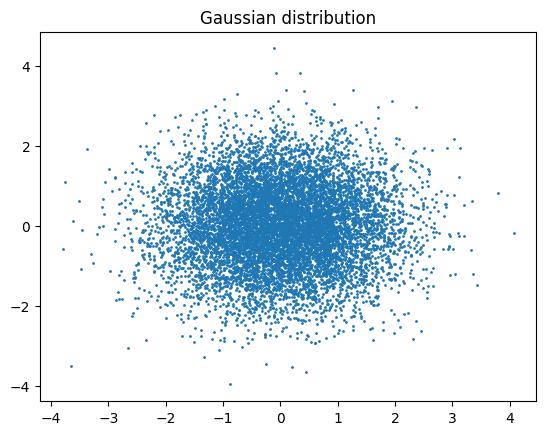

In [ ]:
data = np.random.randn(n, 2)

plt.figure()
plt.scatter(data[:, 0], data[:, 1], s=1)
plt.title('Gaussian distribution')
plt.show()

In [ ]:
R_values = []
for _ in range(iterations):

  kmeans = KMeans(n_clusters=k, random_state=None)
  kmeans.fit(data)
  clusters = kmeans.cluster_centers_

  norms = np.linalg.norm(clusters, axis=1)
  norms_mean = np.mean(norms)
  R_values.append(norms_mean)
cumulative_averages = np.cumsum(R_values) / np.arange(1, len(R_values) + 1)

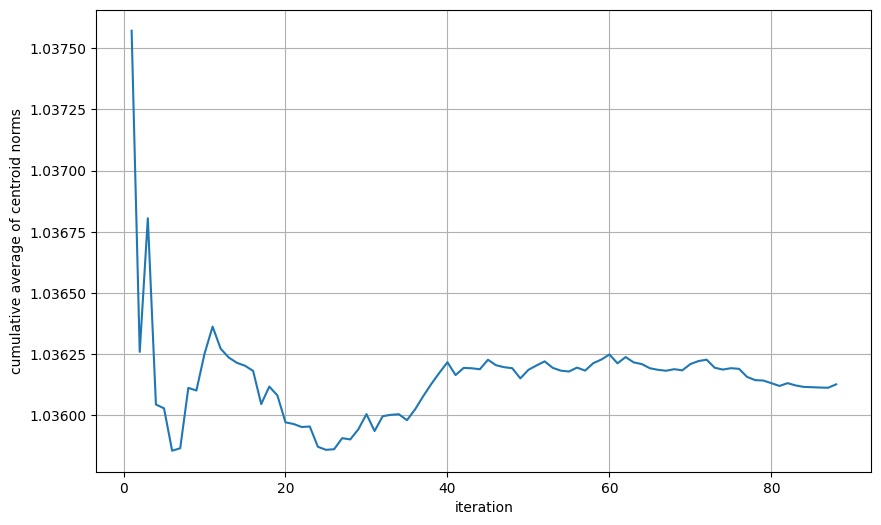

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), cumulative_averages)
plt.xlabel('iteration')
plt.ylabel('cumulative average of centroid norms')
plt.grid(True)
plt.show()

In [ ]:
iterations = 10000
epsilon = 10e-9

In [ ]:
R_values = []
for i in range(iterations):

  kmeans = KMeans(n_clusters=k, random_state=None)
  kmeans.fit(data)
  clusters = kmeans.cluster_centers_

  norms = np.linalg.norm(clusters, axis=1)
  norms_mean = np.mean(norms)
  R_values.append(norms_mean)

cumulative_averages = np.cumsum(R_values) / np.arange(1, len(R_values) + 1)

In [ ]:
final_value = cumulative_averages[-1]
accuracy_point = 0
for i in range(len(cumulative_averages)):
  if np.abs(cumulative_averages[i] - final_value) < epsilon:
    print(f"Converged to 9-digit accuracy at iteration {i + 1}.")
    accuracy_point = i
    break

Converged to 9-digit accuracy at iteration 2899.


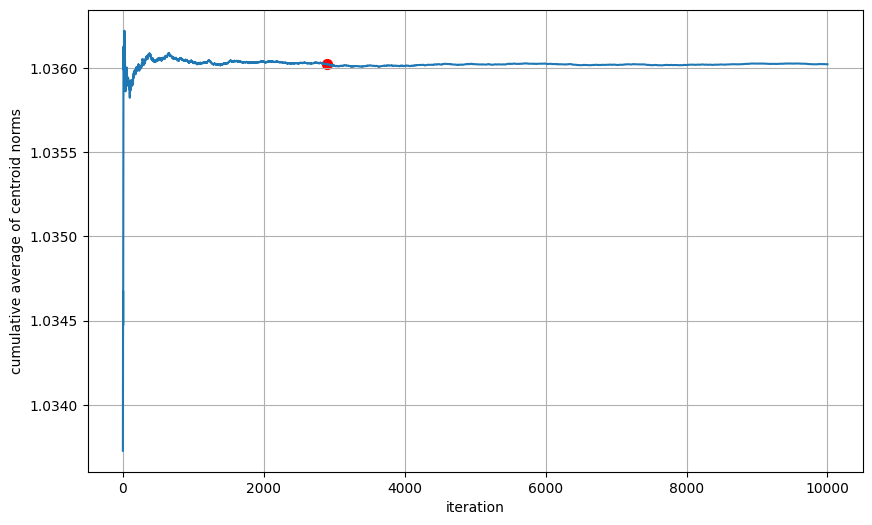

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), cumulative_averages)
plt.xlabel('iteration')
plt.ylabel('cumulative average of centroid norms')
plt.scatter(accuracy_point + 1, cumulative_averages[accuracy_point], color='red', label='Target Point', s=50)
plt.grid(True)
plt.show()